In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import datetime as dt
import statsmodels.formula.api as smf
import missingno as msno
from scipy.stats import norm
from scipy.stats.mstats import winsorize
from fuzzywuzzy import fuzz, process
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)


![title](https://images.ctfassets.net/cnu0m8re1exe/2RsWjZm4hfv6bH2UMWndBB/74c3777eea539a171ec262bb58191bb1/shutterstock_1350759518.jpg?fm=jpg&fl=progressive&w=400&h=300)

# Life Expectancy Data Analysis



<p style='text-align: justify;'> Life expectancy is the key metric for assessing population health. Broader than the narrow metric of the infant and child mortality, which focus solely at mortality at a young age, life expectancy captures the mortality along the entire life course. It tells us the average age of death in a population.

<p style='text-align: justify;'>The Life Expectancy csv file has been compiled from information given by the World Health Organisation, or WHO.The mentioned data has many problems such as lots of missing values in different countries. 

<p style='text-align: justify;'>Moreover,with this csv file the data has been gathered from 2000 to 2015 and then stops. As a result of this, it has not taken into account the factors that the recent Coronavirus pandemic has played in the life expectancy of any given population. It would be really fantastic if that dataset was current up to the present day, but sadly that is not the case. </p>


# The data-set aims to answer the following key questions:

1. Does various predicting factors which has been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy?
2. Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?
3. How does Infant and Adult mortality rates affect life expectancy?
4. Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc.
5. What is the impact of schooling on the lifespan of humans?
6. Does Life Expectancy have positive or negative relationship with drinking alcohol?
7. Do densely populated countries tend to have lower life expectancy?
8. What is the impact of Immunization coverage on life Expectancy?
9. Draw scatter plot, PDF, CDF Corrolation ols for diffrent categoury

# Columns Description

country (Nominal) - the country in which the indicators are from (i.e. United States of America or Congo)

year (Ordinal) - the calendar year the indicators are from (ranging from 2000 to 2015)

status (Nominal) - whether a country is considered to be 'Developing' or 'Developed' by WHO standards
life_expectancy (Ratio) - the life expectancy of people in years for a particular country and year

adult_mortality (Ratio) - the adult mortality rate per 1000 population (i.e. number of people dying between 15 and 60 years per 1000 population); if the rate is 263 then that means 263 people will die out of 1000 between the ages of 15 and 60; another way to think of this is that the chance an individual will die between 15 and 60 is 26.3%

infant_deaths (Ratio) - number of infant deaths per 1000 population; similar to above, but for infants

alcohol (Ratio) - a country's alcohol consumption rate measured as liters of pure alcohol consumption per capita
percentage_expenditure (Ratio) - expenditure on health as a percentage of Gross Domestic Product (gdp)

hepatitis_b (Ratio) - number of 1 year olds with Hepatitis B immunization over all 1 year olds in population

measles (Ratio) - number of reported Measles cases per 1000 population

bmi (Interval/Ordinal) - average Body Mass Index (BMI) of a country's total population

under-five_deaths (Ratio) - number of people under the age of five deaths per 1000 population

polio (Ratio) - number of 1 year olds with Polio immunization over the number of all 1 year olds in population

total_expenditure (Ratio) - government expenditure on health as a percentage of total government expenditure

diphtheria (Ratio) - Diphtheria tetanus toxoid and pertussis (DTP3) immunization rate of 1 year olds

hiv/aids (Ratio) - deaths per 1000 live births caused by HIV/AIDS for people under 5; number of people under 5 who die due to HIV/AIDS per 1000 births

gdp (Ratio) - Gross Domestic Product per capita

population (Ratio) - population of a country

thinness_1-19_years (Ratio) - rate of thinness among people aged 10-19 (Note: variable should be renamed to thinness_10-19_years to more accurately represent the variable)

thinness_5-9_years (Ratio) - rate of thinness among people aged 5-9
income_composition_of_resources (Ratio) - Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

schooling (Ratio) - average number of years of schooling of a 
population

In [2]:
# Uploada dataset

life_exp = pd.read_csv('Life_Expectancy_Data.csv',parse_dates = ['Year'])
life_exp.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015-01-01,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014-01-01,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013-01-01,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012-01-01,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011-01-01,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
life_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Country                          2938 non-null   object        
 1   Year                             2938 non-null   datetime64[ns]
 2   Status                           2938 non-null   object        
 3   Life expectancy                  2928 non-null   float64       
 4   Adult Mortality                  2928 non-null   float64       
 5   infant deaths                    2938 non-null   int64         
 6   Alcohol                          2744 non-null   float64       
 7   percentage expenditure           2938 non-null   float64       
 8   Hepatitis B                      2385 non-null   float64       
 9   Measles                          2938 non-null   int64         
 10   BMI                             2904 non-null   float64    

In [4]:
life_exp.describe()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [5]:
# Standartaizing Columns names

life_exp.columns = life_exp.columns.str.strip().str.lower().str.replace(' ','_').str.replace('-','_').str.replace('/', '_')
life_exp.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv_aids', 'gdp', 'population', 'thinness__10_19_years',
       'thinness_5_9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

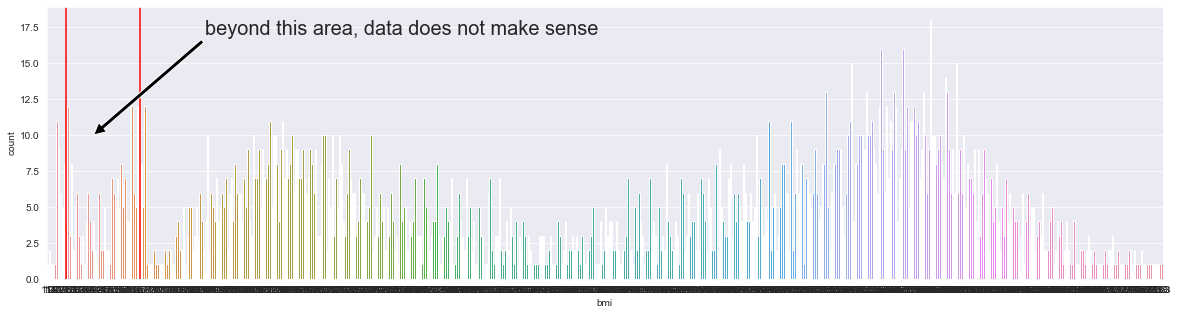

In [6]:
# Showing the BMI valid range

sns.countplot(x = 'bmi', data = life_exp)
plt.axvline(x=10, c='r')
plt.axvline(x=50, c='r')

plt.annotate('beyond this area, data does not make sense', size =20, xy=(25, 10),  
            xytext=(300, 18), 
            arrowprops=dict(facecolor='black'),
            horizontalalignment='right', verticalalignment='top'
            )

plt.show()

1.[BMI Reffrence1](https://en.wikipedia.org/wiki/Body_mass_index)<br>
2.[BMI Reffrence2](https://www.cdc.gov/obesity/adult/defining.html)

If your BMI is less than 18.5, it falls within the underweight range.
If your BMI is 18.5 to <25, it falls within the healthy weight range.
If your BMI is 25.0 to <30, it falls within the overweight range.
If your BMI is 30.0 or higher, it falls within the obesity range.


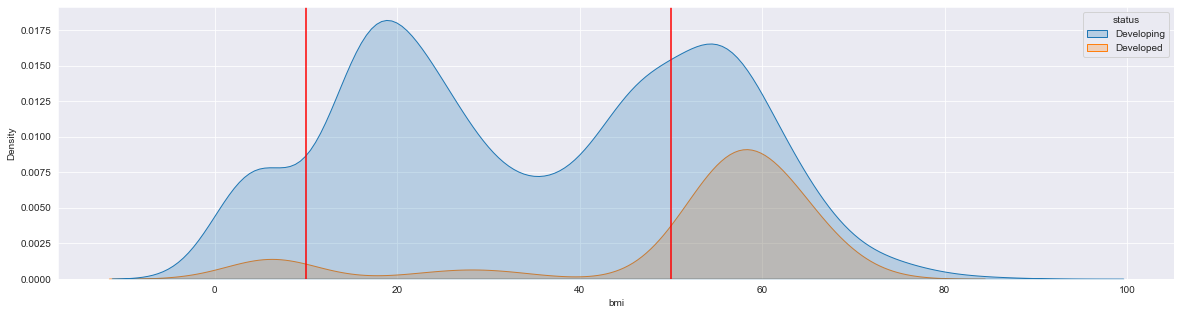

In [7]:
# showing the BMI distribution  : the accepted range is between 16 to 40

sns.kdeplot(x='bmi', data=life_exp, shade = True, hue='status')
plt.axvline(x=10, c="r")
plt.axvline(x=50, c="r")

plt.show()

In [8]:
# Drop BMI column

life_exp.drop(columns = 'bmi', inplace = True)

In [9]:
# cheking BMI is dropped or not
assert 'bmi' not in life_exp.columns

In [10]:
life_exp.describe()

,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness__10_19_years,thinness_5_9_years,income_composition_of_resources,schooling
count,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


All the 0 and 1 values for bellow columns is meaningless. Therefore, It should be replace with nan. `'adult_mortality','hiv_aids','alcohol','thinness__10_19_years','income_composition_of_resources','thinness_5_9_years','schooling'`

In [11]:
specific_col = ['adult_mortality','hiv_aids','alcohol','thinness__10_19_years',
                'income_composition_of_resources','thinness_5_9_years','schooling']
for col in specific_col:
    life_exp[col].replace([0,1], np.nan, inplace=True)
life_exp.isna().sum()

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     22
infant_deaths                        0
alcohol                            198
percentage_expenditure               0
hepatitis_b                        553
measles                              0
under_five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv_aids                            12
gdp                                448
population                         652
thinness__10_19_years              108
thinness_5_9_years                  96
income_composition_of_resources    297
schooling                          191
dtype: int64

All the 0 values for bellow columns is meaningless. Therefore, It should be replace with nan. 
`'infant_deaths','percentage_expenditure','measles','under_five_deaths'`

In [12]:
specific1_col = ['infant_deaths','percentage_expenditure','measles','under_five_deaths']
for col in specific1_col:
    life_exp[col].replace([0], np.nan, inplace=True)
life_exp.isna().sum()

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     22
infant_deaths                      848
alcohol                            198
percentage_expenditure             611
hepatitis_b                        553
measles                            983
under_five_deaths                  785
polio                               19
total_expenditure                  226
diphtheria                          19
hiv_aids                            12
gdp                                448
population                         652
thinness__10_19_years              108
thinness_5_9_years                  96
income_composition_of_resources    297
schooling                          191
dtype: int64

In [13]:
# Make sure there is no duplicated values
life_exp.duplicated().sum()

0

In [14]:
# make the status to category type
life_exp['status'] = life_exp['status'].astype('category')
life_exp['status'].describe()

count           2938
unique             2
top       Developing
freq            2426
Name: status, dtype: object

In [15]:
life_exp['status'].value_counts()

Developing    2426
Developed      512
Name: status, dtype: int64

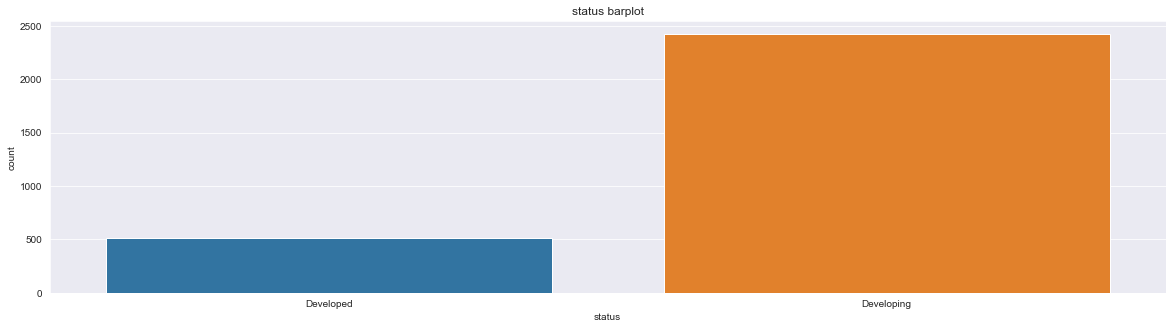

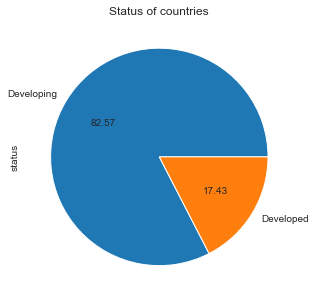

In [16]:
# show the proporation of status

sns.countplot(x = 'status', data = life_exp)
plt.title("status barplot")
plt.show()

life_exp.status.value_counts().plot(kind='pie', autopct='%.2f')
plt.title("Status of countries")
plt.show()

In [17]:
#Showing the missing value in Life Expectency and Adult Mortality

life_exp[life_exp['life_expectancy'].isna() & life_exp['adult_mortality'].isna()]

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness__10_19_years,thinness_5_9_years,income_composition_of_resources,schooling
624,Cook Islands,2013-01-01,Developing,NaN,NaN,NaN,0.01,NaN,98.0,NaN,...,98.0,3.58,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
769,Dominica,2013-01-01,Developing,NaN,NaN,NaN,0.01,11.419555,96.0,NaN,...,96.0,5.58,96.0,0.1,722.756650,NaN,2.7,2.6,0.721,12.7
1650,Marshall Islands,2013-01-01,Developing,NaN,NaN,NaN,0.01,871.878317,8.0,NaN,...,79.0,17.24,79.0,0.1,3617.752354,NaN,0.1,0.1,NaN,NaN
1715,Monaco,2013-01-01,Developing,NaN,NaN,NaN,0.01,NaN,99.0,NaN,...,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN
1812,Nauru,2013-01-01,Developing,NaN,NaN,NaN,0.01,15.606596,87.0,NaN,...,87.0,4.65,87.0,0.1,136.183210,NaN,0.1,0.1,NaN,9.6
1909,Niue,2013-01-01,Developing,NaN,NaN,NaN,0.01,NaN,99.0,NaN,...,99.0,7.20,99.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
1958,Palau,2013-01-01,Developing,NaN,NaN,NaN,NaN,344.690631,99.0,NaN,...,99.0,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2
2167,Saint Kitts and Nevis,2013-01-01,Developing,NaN,NaN,NaN,8.54,NaN,97.0,NaN,...,96.0,6.14,96.0,0.1,NaN,NaN,3.7,3.6,0.749,13.4
2216,San Marino,2013-01-01,Developing,NaN,NaN,NaN,0.01,NaN,69.0,NaN,...,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1
2713,Tuvalu,2013-01-01,Developing,NaN,NaN,NaN,0.01,78.281203,9.0,NaN,...,9.0,16.61,9.0,0.1,3542.135890,1819.0,0.2,0.1,NaN,NaN


In [18]:
# our goal is to find the relation between life expectency and the other independent variables. 
# So, we need to drop life expectency nan values 
life_exp.dropna(subset=['life_expectancy','adult_mortality'], axis = 0, inplace = True)

In [19]:
# make a deceision to drop one of the dieses(hepatitis) with high nan values.

life_exp.drop(columns = ['hepatitis_b'], inplace = True)


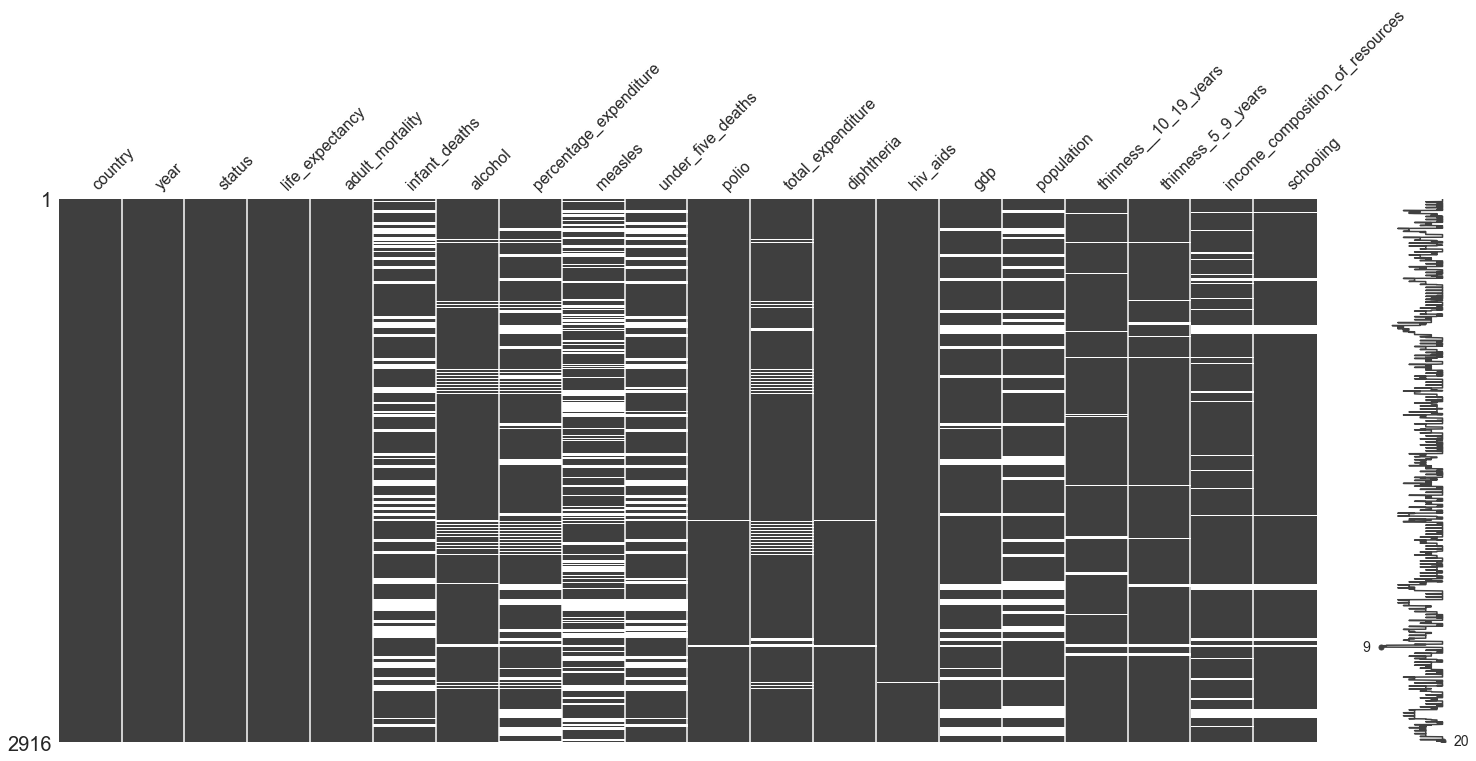

In [20]:
# displaying all missing values with the matrix
msno.matrix(life_exp)
plt.show()

### Transform `NA` with mean and median values of variables. 

firstly, replceing na values for each countries by mean values. Secondly, other remained NA, grouped by status and replaced by median. 

In [21]:
# replacing NA values for each countries with mean values
for column in life_exp.columns[3:]:
    life_exp[column] = life_exp[column].fillna(life_exp.groupby('country')[column].transform('mean'))

In [22]:
variables=['alcohol','total_expenditure', 'thinness__10_19_years','infant_deaths',
           'percentage_expenditure','measles','under_five_deaths',
           'thinness_5_9_years', 'income_composition_of_resources', 'schooling']

# replacing NA values for each status with median values

for column in variables:
    
    life_exp[column] = life_exp[column].fillna(life_exp.groupby('status')[column].transform('median'))
    

In [23]:
# due to all values for two countries 'Sudan','South Sudan'were nan,
# so,they were dropped.

life_exp_index = life_exp.set_index('country')
df = life_exp_index.drop(['Sudan','South Sudan']).isna().sum()
life_exp = life_exp_index.reset_index()

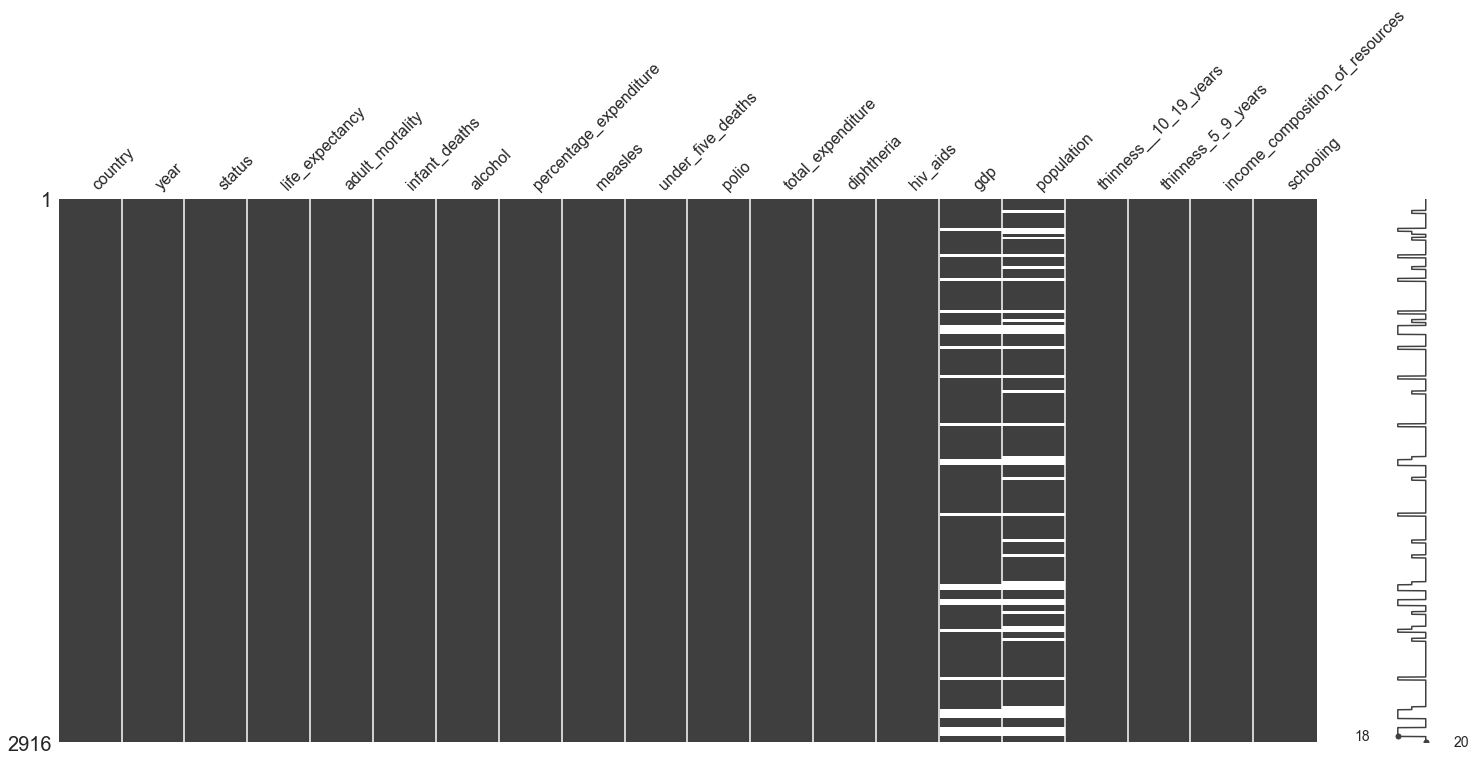

In [24]:
# Checking remained missing values

msno.matrix(life_exp)
plt.show()

Population and GDP columns had alot of NA values and incorrect entries.Therefore, it was only convenient to replace them with actual data from "[worldbank website](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD)"



In [32]:
# Uploading population and GDP data
pop = pd.read_csv('API_Population.csv')
GDP = pd.read_csv('API_GDP.csv')

In [33]:
# cleanig title of columns
pop.columns = pop.columns.str.lower().str.replace(' ','_').str.strip()


GDP.columns = GDP.columns.str.lower().str.replace(' ','_').str.strip()


In [34]:
# change the format of GDP and Population tables by transposing 

pop_new = pop.melt(id_vars = ['country_name'],var_name = 'year', value_name = 'population')
pop_new.sort_values(['country_name','year'],ignore_index=True,inplace = True)
pop_new['year']= pd.to_datetime(pop_new['year'])

GDP_new = GDP.melt(id_vars = ['country_name'],var_name = 'year', value_name = 'gdp')
GDP_new.sort_values(['country_name','year'],ignore_index=True,inplace = True)
GDP_new['year']= pd.to_datetime(GDP_new['year'])

In [35]:
print(GDP_new['gdp'].isna().sum(), 
      pop_new['population'].isna().sum())

202 20


In [36]:
# Dealing with missing values in both GDP and Pop

GDP_new['gdp'] = GDP_new['gdp'].fillna(GDP_new.groupby(['country_name'])["gdp"].transform('mean'))
pop_new['population'] = pop_new['population'].fillna(pop_new.groupby(['country_name'])["population"].transform('mean'))

In [41]:
# Drop remaining NA IN GDP
GDP_new.dropna(subset = ['gdp'], inplace = True)
GDP_new.isna().sum()

country_name    0
year            0
gdp             0
dtype: int64

In [42]:
# Drop remaining NA IN POP
pop_new.dropna(subset = ['population'], inplace = True)
pop_new.isna().sum()

country_name    0
year            0
population      0
dtype: int64

In [43]:
# Preparing unique values for merging two dataframs by fuzzy wuzzy;GDP and Life-exp

for country in GDP_new['country_name'].unique():
    matches = process.extract(country, life_exp['country'].unique(), limit = life_exp.shape[0])
   
    for potential_match in matches:
          
        if potential_match[1] >= 80:
        
            life_exp.loc[life_exp['country'] == potential_match[0], 'country'] = country

In [46]:
# merging GDP with life_exp table
life_exp_merged = life_exp.merge(GDP_new, how="left", left_on =['country','year'], 
                                 right_on = ['country_name','year'], suffixes = ['_life', '_gdp'])


In [47]:
# Preparing unique values for merging two dataframs by fuzzy wuzzy;Pop and Life-exp

for country in pop_new['country_name'].unique():
    matches = process.extract(country, life_exp['country'].unique(), limit = life_exp.shape[0])
   
    for potential_match in matches:
          
        if potential_match[1] >= 80:
        
            life_exp.loc[life_exp['country'] == potential_match[0], 'country'] = country

In [48]:
# merging Pop with life_exp table
life_egp = life_exp_merged.merge(pop_new, how="left", left_on =['country','year'],
                                         right_on = ['country_name','year'],suffixes=('_life', '_pop') )
life_egp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2916 entries, 0 to 2915
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   country                          2916 non-null   object        
 1   year                             2916 non-null   datetime64[ns]
 2   status                           2916 non-null   category      
 3   life_expectancy                  2916 non-null   float64       
 4   adult_mortality                  2916 non-null   float64       
 5   infant_deaths                    2916 non-null   float64       
 6   alcohol                          2916 non-null   float64       
 7   percentage_expenditure           2916 non-null   float64       
 8   measles                          2916 non-null   float64       
 9   under_five_deaths                2916 non-null   float64       
 10  polio                            2916 non-null   float64    

In [49]:
# droping unvalid and repetetive columns
life_egp.drop(columns=['gdp_life','population_life','country_name_life','country_name_pop'],
                      axis=1, inplace= True)

In [50]:
life_egp.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,measles,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,thinness__10_19_years,thinness_5_9_years,income_composition_of_resources,schooling,gdp_gdp,population_pop
0,Afghanistan,2015-01-01,Developing,65.0,263.0,62.0,0.01,71.279624,1154.0,83.0,6.0,8.16,65.0,0.1,17.2,17.3,0.479,10.1,1.990711e+10,34413603.0
1,Afghanistan,2014-01-01,Developing,59.9,271.0,64.0,0.01,73.523582,492.0,86.0,58.0,8.18,62.0,0.1,17.5,17.5,0.476,10.0,2.048489e+10,33370804.0
2,Afghanistan,2013-01-01,Developing,59.9,268.0,66.0,0.01,73.219243,430.0,89.0,62.0,8.13,64.0,0.1,17.7,17.7,0.470,9.9,2.056107e+10,32269592.0
3,Afghanistan,2012-01-01,Developing,59.5,272.0,69.0,0.01,78.184215,2787.0,93.0,67.0,8.52,67.0,0.1,17.9,18.0,0.463,9.8,2.000160e+10,31161378.0
4,Afghanistan,2011-01-01,Developing,59.2,275.0,71.0,0.01,7.097109,3013.0,97.0,68.0,7.87,68.0,0.1,18.2,18.2,0.454,9.5,1.780429e+10,30117411.0


##### EDA Section

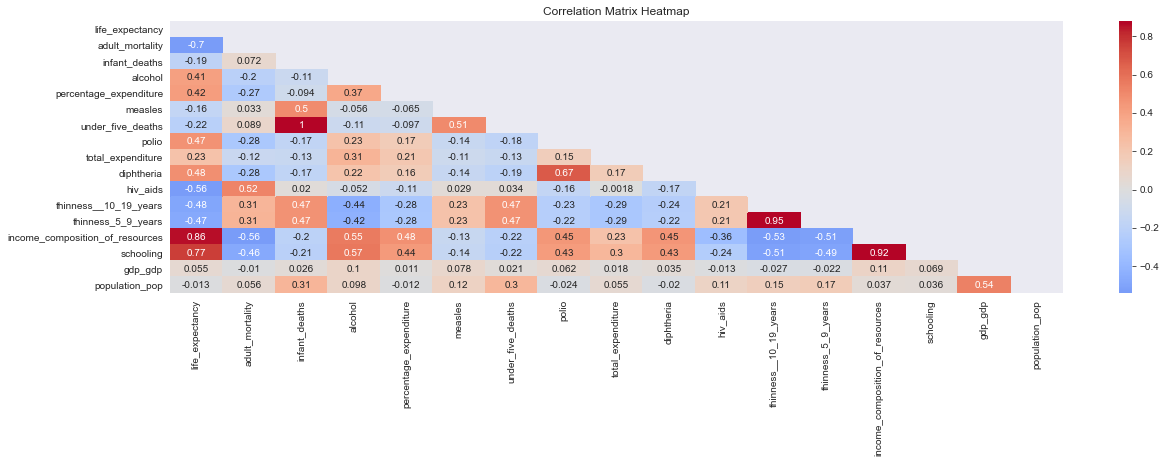

In [53]:
# Corrolation heatmap
lifemap = life_egp.iloc[:,3:]
mask = np.triu(lifemap.corr())

sns.heatmap(lifemap.corr(), annot = True, cmap='coolwarm', mask = mask,center=0, robust=True)
plt.title('Correlation Matrix Heatmap')

plt.show()

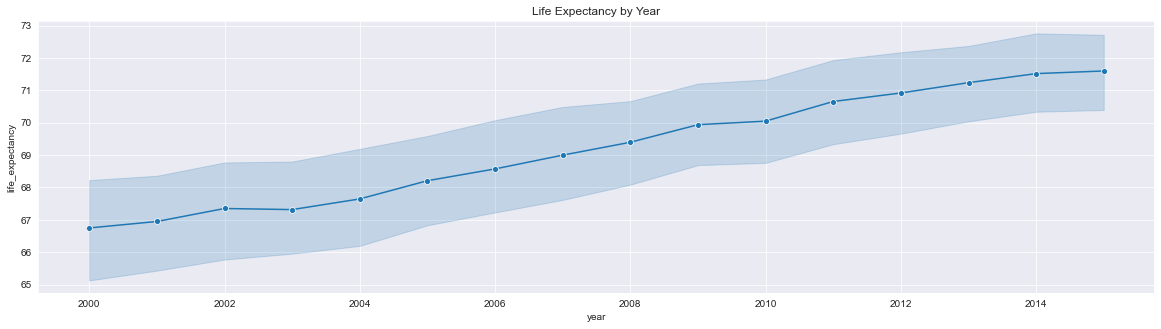

In [55]:
# Draw a lineplot 

sns.lineplot(x='year', y='life_expectancy', data=life_egp, marker='o')
plt.title('Life Expectancy by Year')
plt.show()



In [56]:
# mean information about variables
variables = ["status"] + list(life_egp.columns)[3:]
life_egp[variables].groupby("status").agg(["mean"])

,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,measles,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,thinness__10_19_years,thinness_5_9_years,income_composition_of_resources,schooling,gdp_gdp,population_pop
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
status,,,,,,,,,,,,,,,,,
Developed,79.200196,79.839530,2.686888,9.847412,3081.745037,579.012200,2.927593,93.731898,7.552276,93.473581,0.100000,1.319569,1.292871,0.853342,15.836595,8.902691e+11,8.860333e+07
Developing,67.070644,183.664865,38.629106,3.485482,357.948341,2988.828433,53.185863,79.931904,5.553947,79.726166,2.110667,5.674474,5.670982,0.616665,11.340501,9.350151e+11,6.039977e+07


Showing the variables distribution with boxplot and kdeplot 

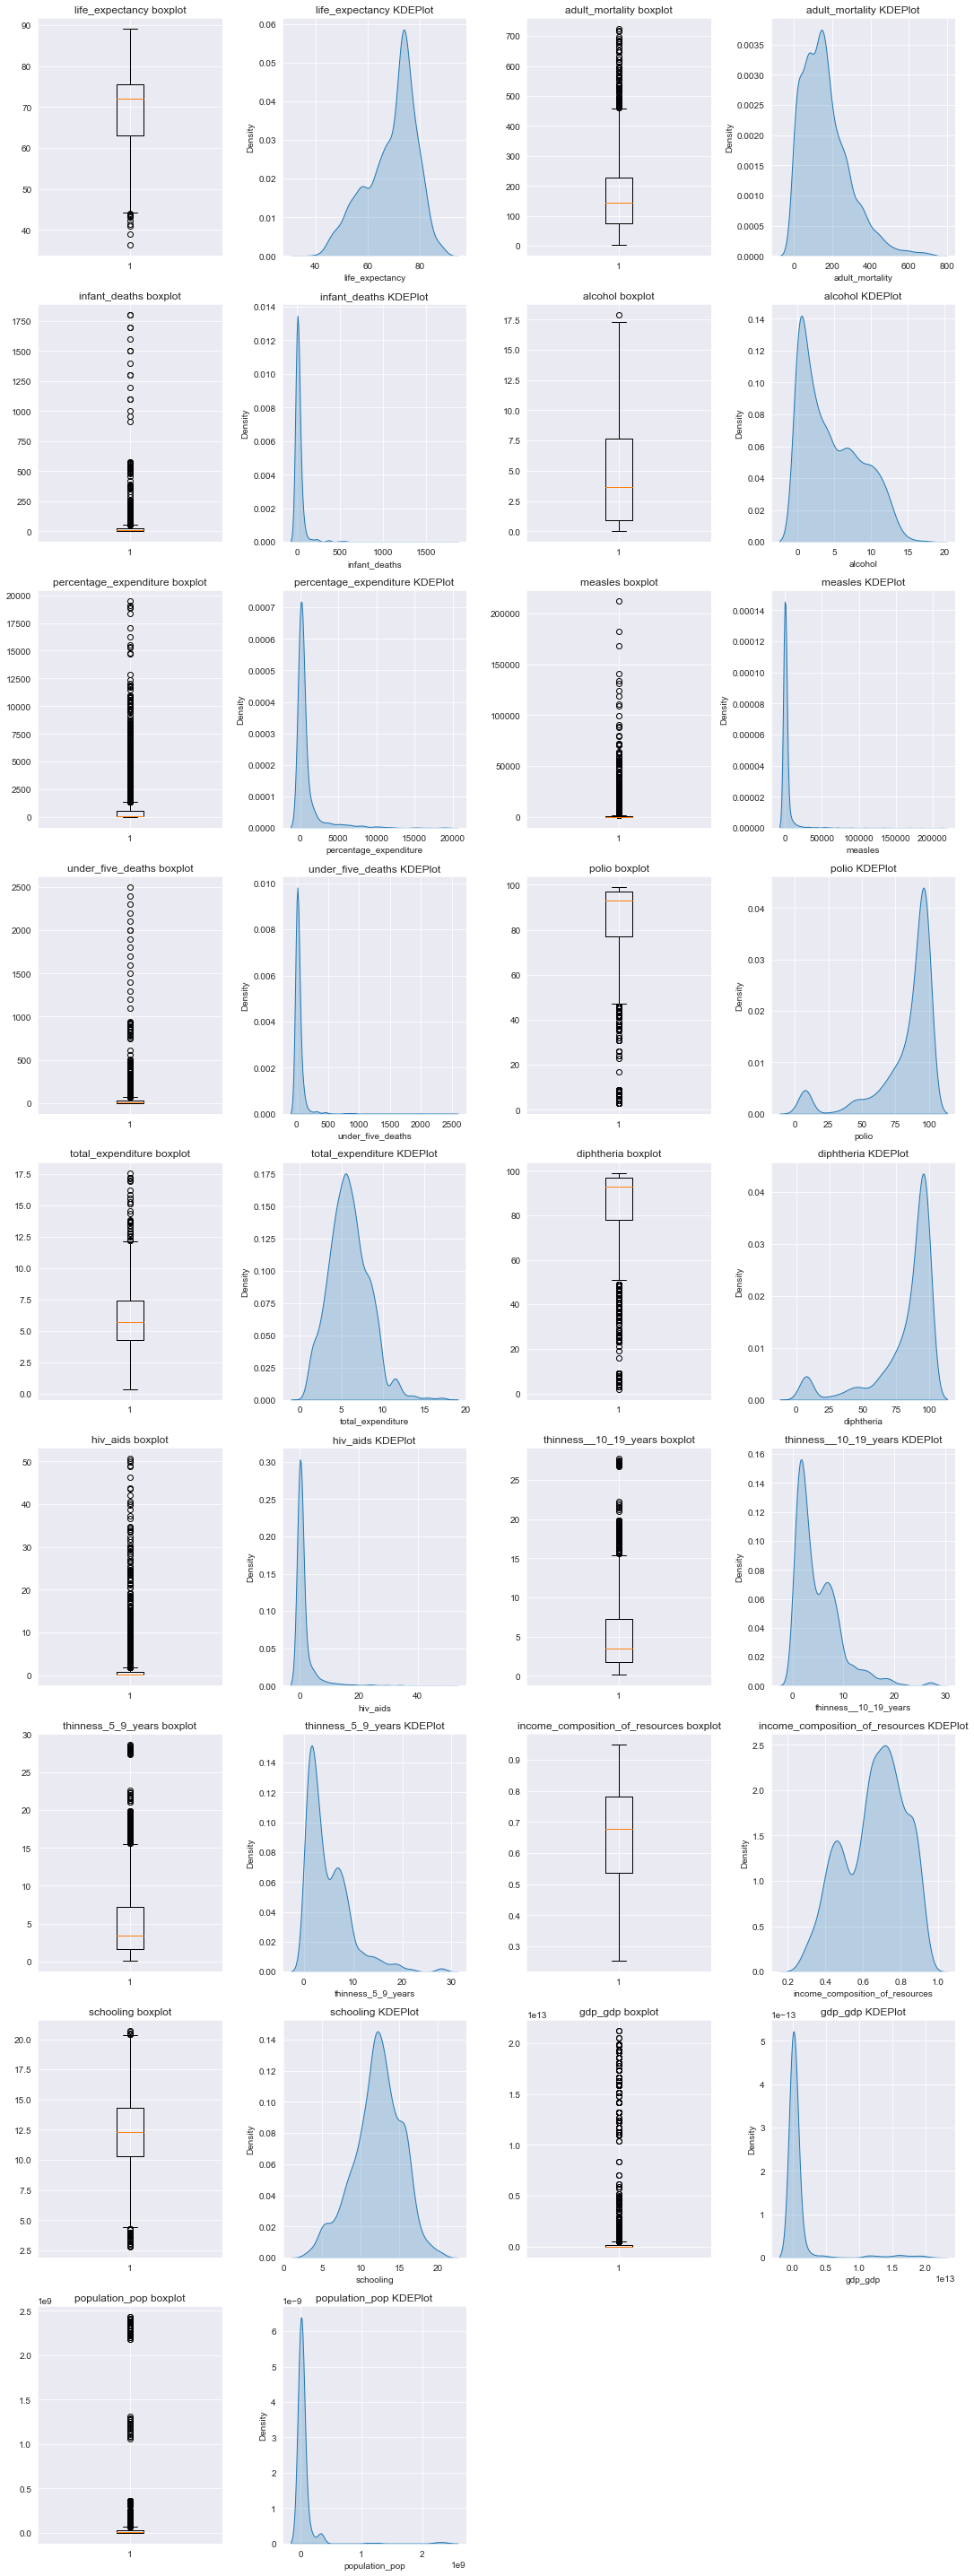

In [57]:
cont_vars = list(life_egp.columns)[3:]
def outliers_visual(data):
    ''' outliers_visual function gets the life_egp 
    data and returns boxplot and kdeplot 
    for each variable
    ''' 
    plt.figure(figsize=(15, 40))
    i = 0
    for col in cont_vars:
        i += 1
        plt.subplot(9, 4, i)
        plt.boxplot(data[col])
        plt.title('{} boxplot'.format(col))
        i += 1
        plt.subplot(9, 4, i)
        sns.kdeplot(data[col], shade = True)
        plt.title('{} KDEPlot'.format(col))
    plt.tight_layout()
    plt.show()
outliers_visual(life_egp)

Define the function which it compares life expectancy with othe variable with respect to status.

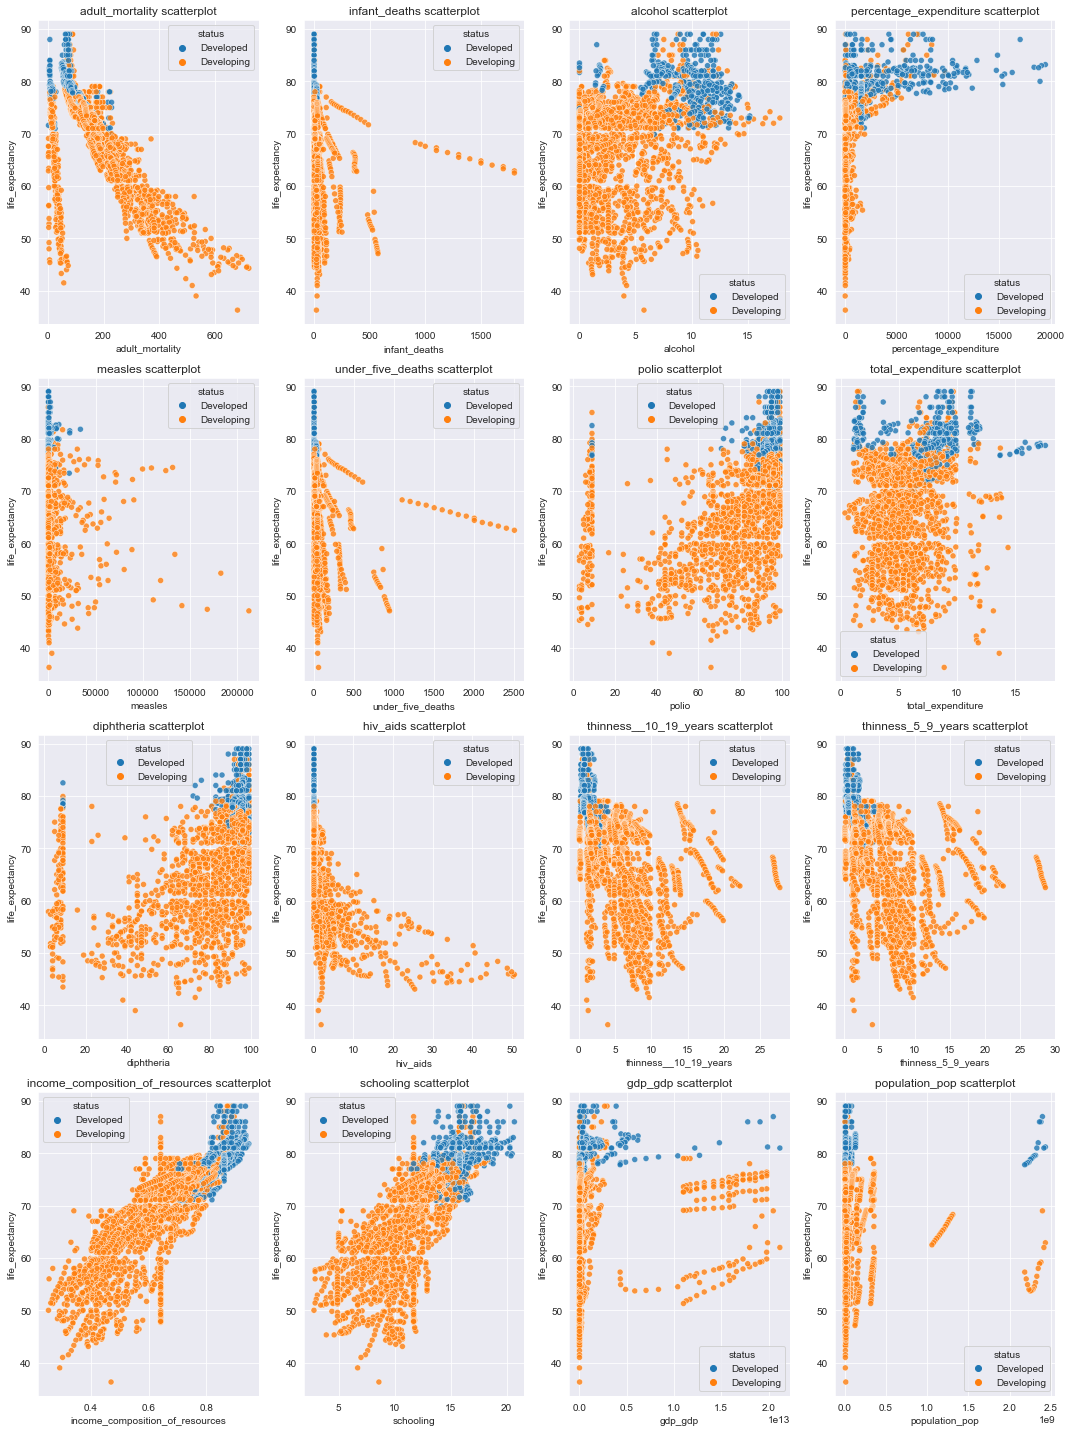

In [58]:
cont_vars = list(life_egp.columns)[4:]
def comparision1(data):
    
    
    plt.figure(figsize=(15, 20))
    i = 0
    for col in cont_vars:
        i += 1
        plt.subplot(4, 4, i)
        sns.scatterplot(data=data, x= col, y='life_expectancy', 
                        hue= 'status', alpha = 0.8) 
                        
        plt.title('{} scatterplot'.format(col))
   
    plt.tight_layout()
    plt.show()
comparision1(life_egp)

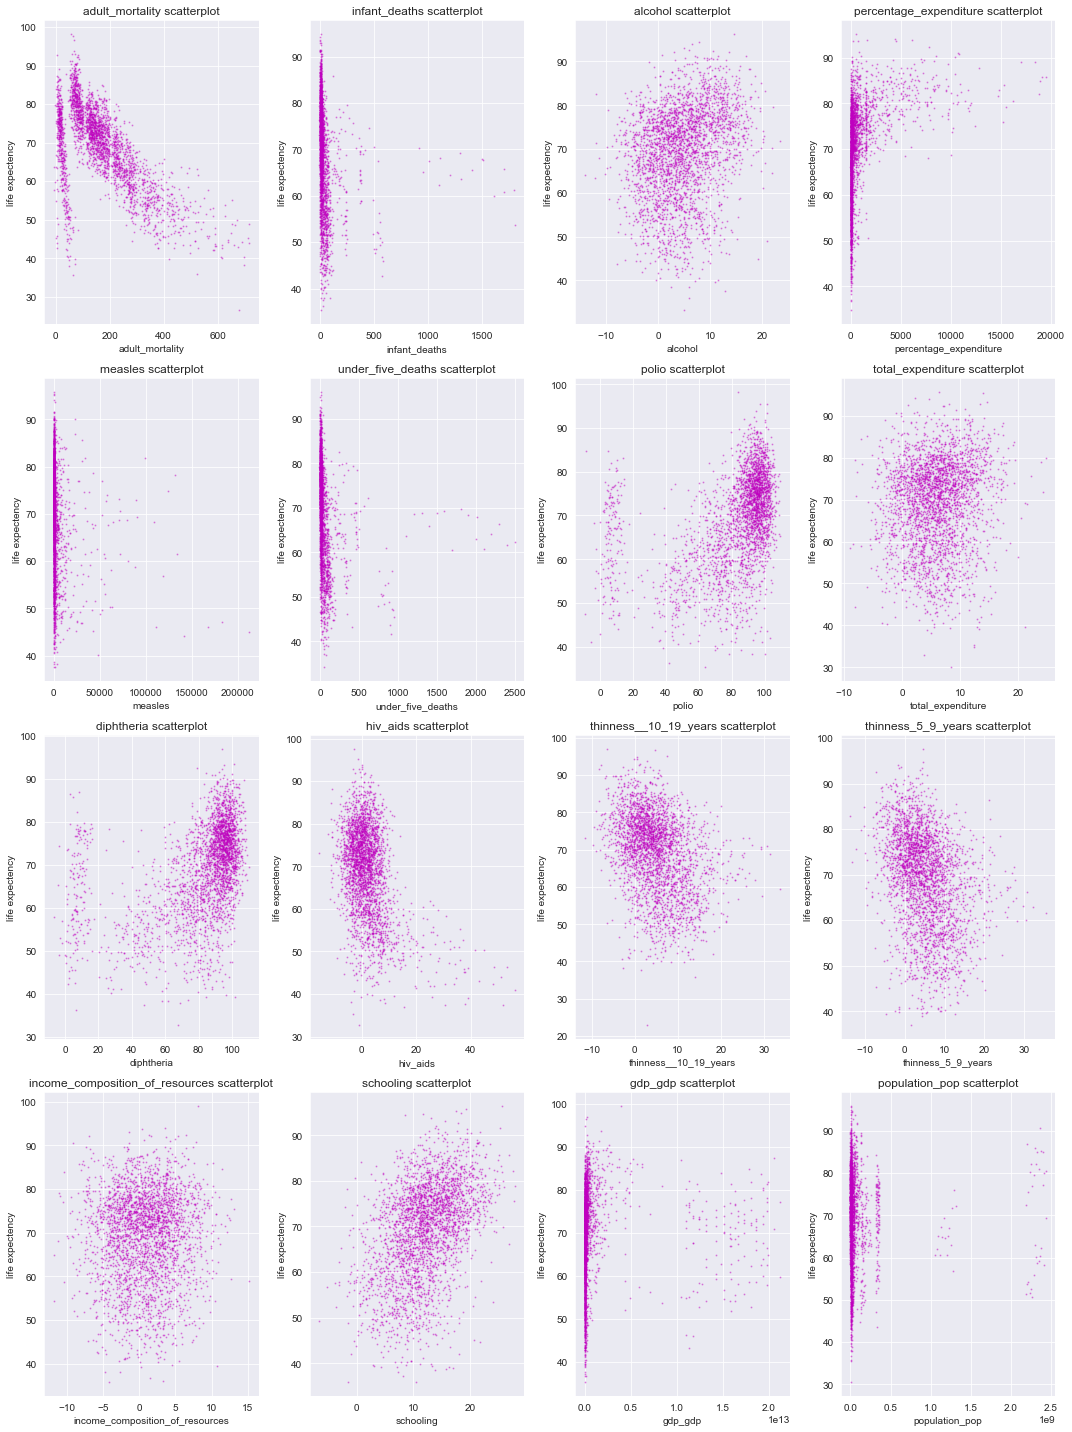

In [59]:
# Jitter function make the result more noisy 
# to get better analysis and result

def jitter(values):
    return values + np.random.normal(0,4,values.shape)

cont_vars = list(life_egp.columns)[4:]

def comparision2(data):
    plt.figure(figsize=(15, 20))
    i = 0
    for col in cont_vars:
        i += 1
        plt.subplot(4, 4, i)
        plt.plot(jitter(data[col]), jitter(data.life_expectancy), 'mo',
                        markersize = 1, alpha = 0.35) 
                        
        plt.title('{} scatterplot'.format(col))
        plt.xlabel(f'{col}')
        plt.ylabel('life expectency')
        
        
    plt.tight_layout()
    plt.show()
comparision2(life_egp)

In [60]:
# replacing stauts values with 0 and 1 
life_egp['status']= life_egp['status'].replace({'Developing': 0, 'Developed': 1})

# type change of status with integer
life_egp['status'] = life_egp['status'].astype('int')

Dealing with outliears withwinsorize method( limiting the outliears)

In [61]:
def test_wins(col, lower_limit=0, upper_limit=0, show_plot=False):
    wins_data = winsorize(life_egp[col], limits=(lower_limit, 
                                                 upper_limit)).tolist()
    
    wins_dict[col] = wins_data
    if show_plot == True:
        plt.figure(figsize=(15,5))
        plt.subplot(121)
        plt.boxplot(life_egp[col])
        plt.title('original {}'.format(col))
        plt.subplot(122)
        plt.boxplot(wins_data)
        plt.title('wins=({},{}) {}'.format(lower_limit, 
                                           upper_limit, col))
        plt.show()


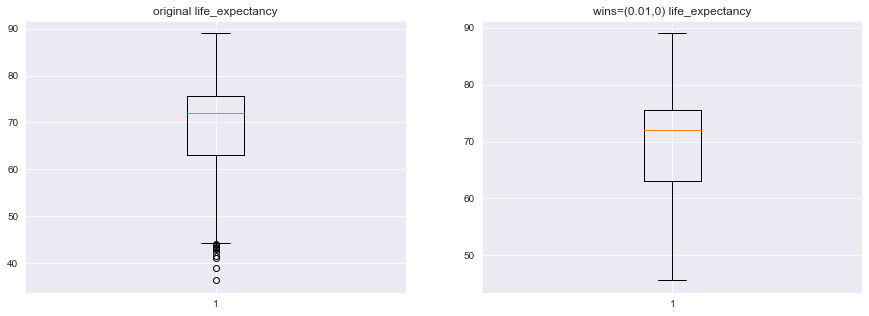

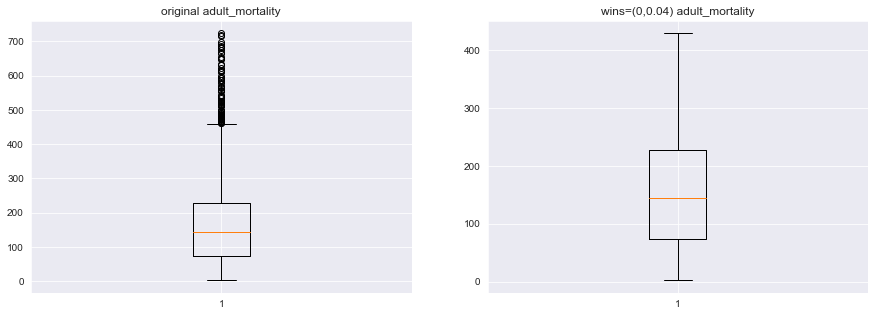

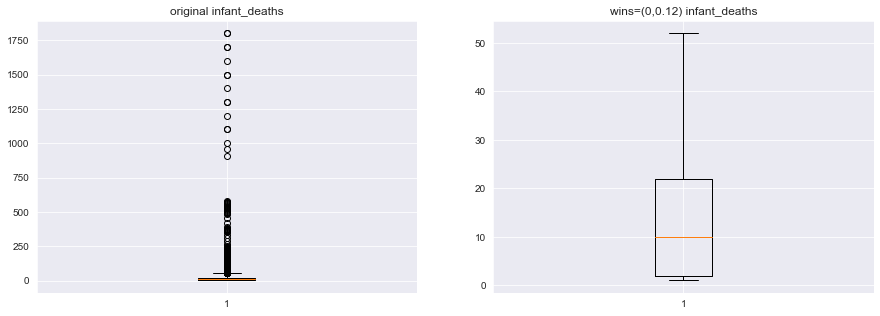

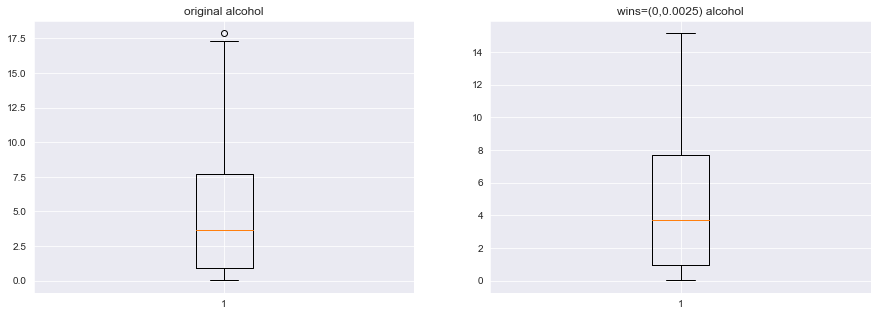

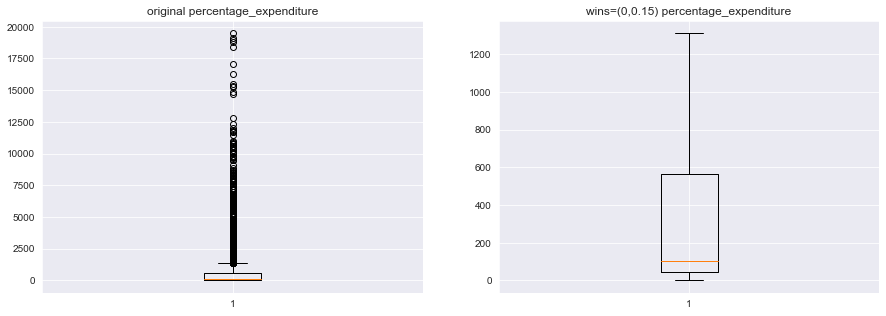

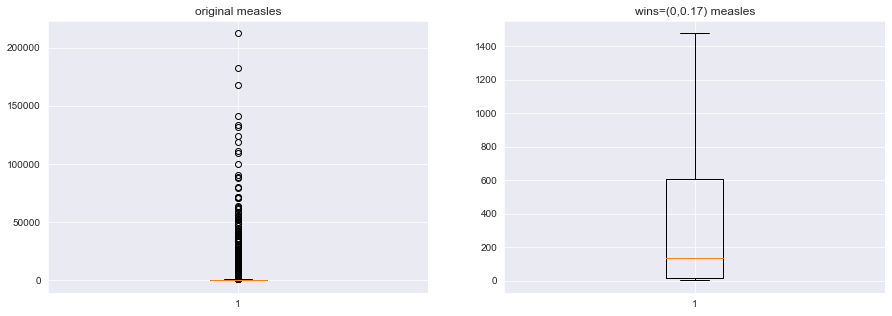

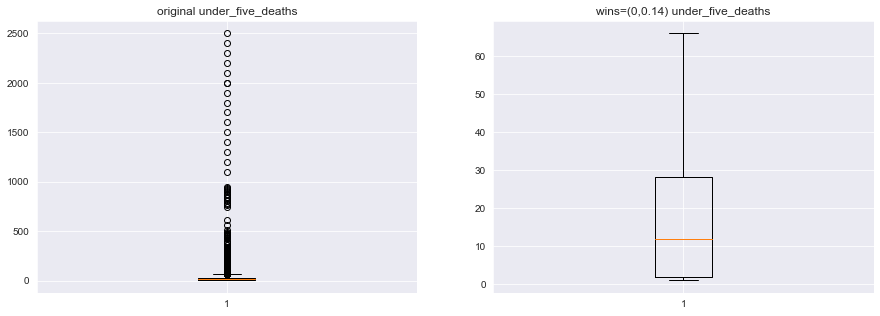

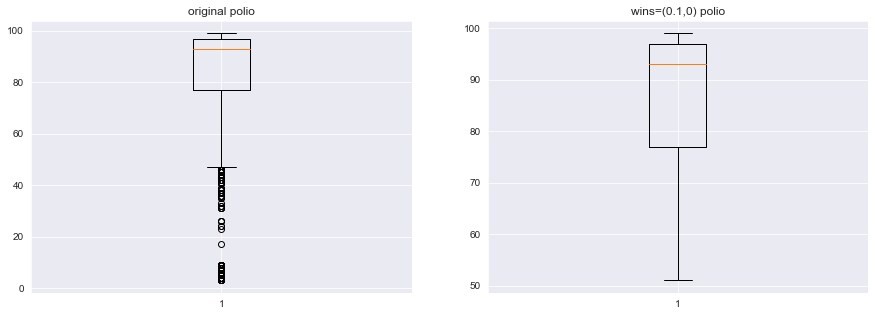

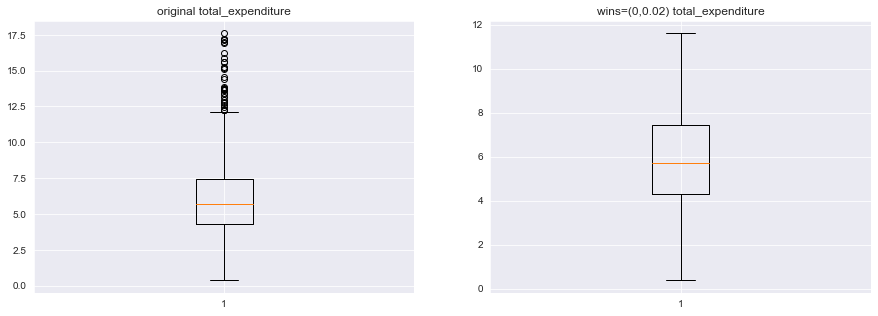

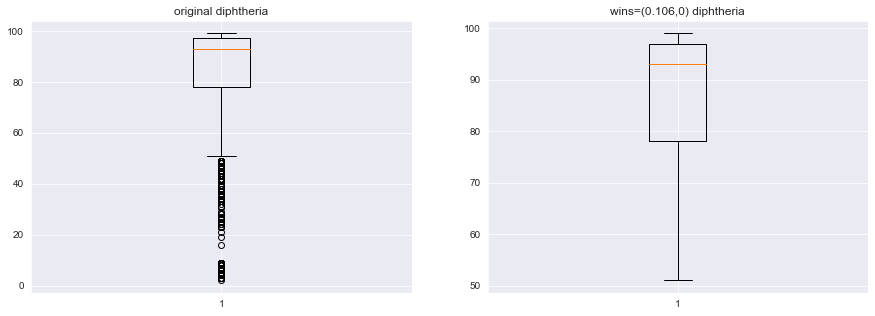

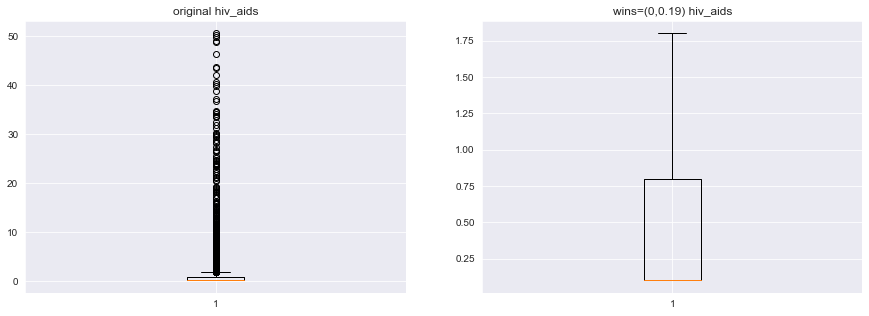

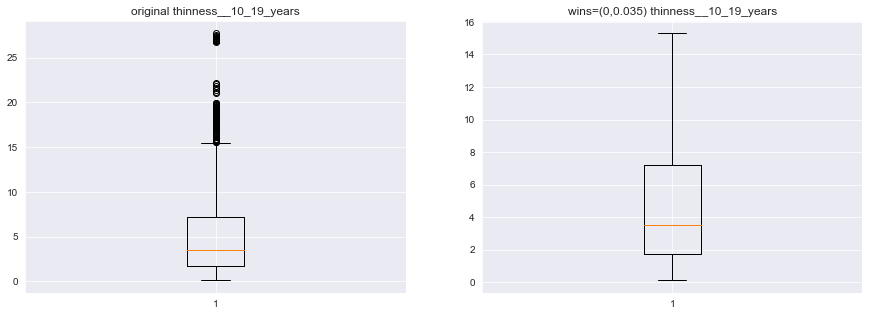

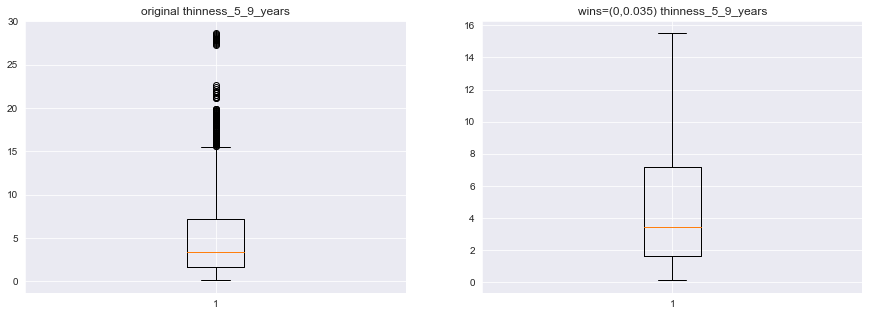

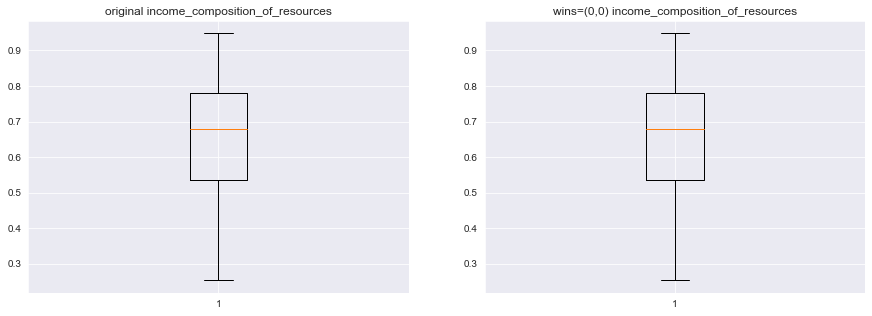

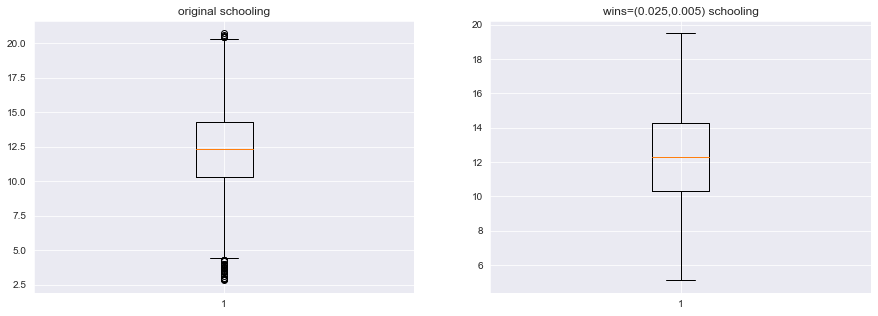

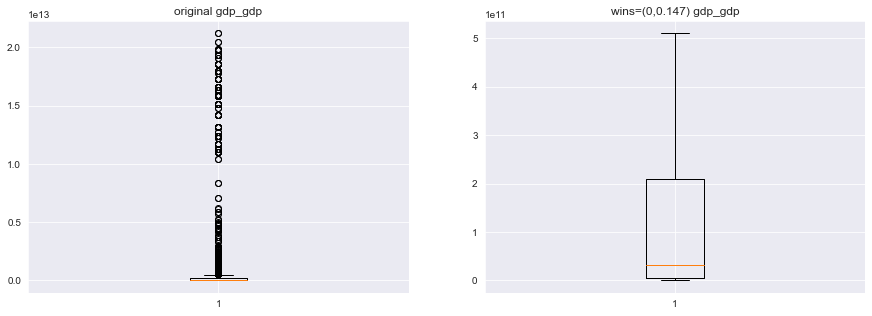

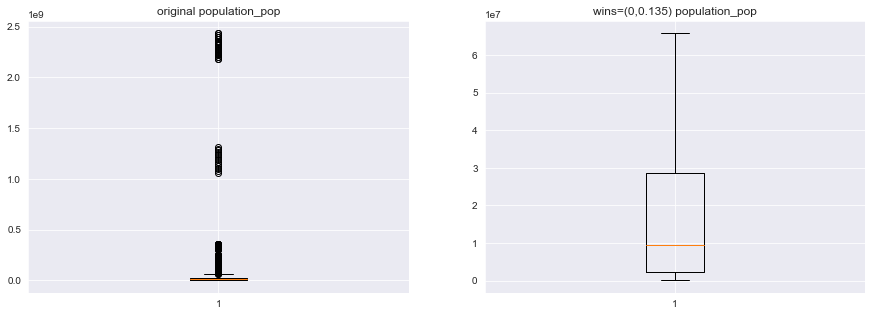

In [62]:
cont_vars = list(life_egp.columns)[3:]
wins_dict = {}
test_wins(cont_vars[0], lower_limit=.01, show_plot=True)
test_wins(cont_vars[1], upper_limit=.04, show_plot=True)
test_wins(cont_vars[2], upper_limit=0.12, show_plot=True)
test_wins(cont_vars[3], upper_limit=.0025, show_plot=True)
test_wins(cont_vars[4], upper_limit=.15, show_plot=True)
test_wins(cont_vars[5], upper_limit=.17, show_plot=True)
test_wins(cont_vars[6], upper_limit=.14, show_plot=True)
test_wins(cont_vars[7], lower_limit=.1, show_plot=True)
test_wins(cont_vars[8], upper_limit=.02, show_plot=True)
test_wins(cont_vars[9], lower_limit=.106, show_plot=True)
test_wins(cont_vars[10], upper_limit=.19, show_plot=True)
test_wins(cont_vars[11], upper_limit=.035, show_plot=True)
test_wins(cont_vars[12], upper_limit=.035, show_plot=True)
test_wins(cont_vars[13], upper_limit=0, show_plot=True)
test_wins(cont_vars[14], lower_limit=.025,upper_limit=.005, show_plot=True)
test_wins(cont_vars[15], upper_limit=.147, show_plot=True)
test_wins(cont_vars[16], upper_limit=.135, show_plot=True)

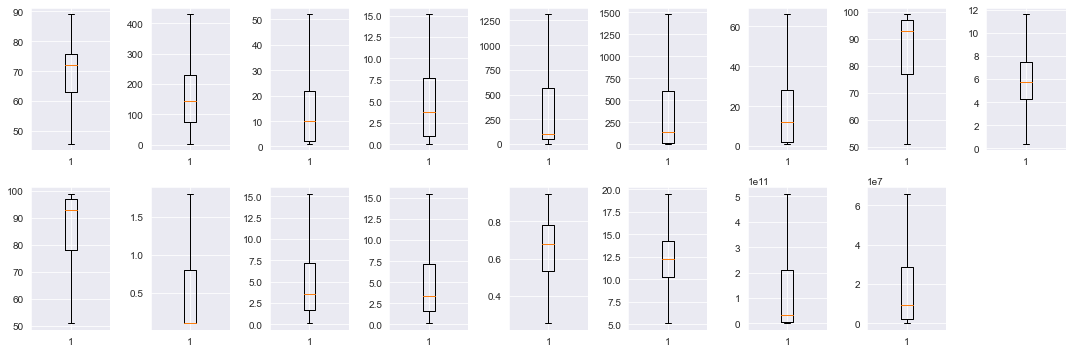

In [64]:
# arrange the winsorize process results in a short glance
plt.figure(figsize=(15,5))
for i, col in enumerate(cont_vars, 1):
    plt.subplot(2, 9, i)
    plt.boxplot(wins_dict[col])
plt.tight_layout()
plt.show()

In [65]:
# out put of winsorize function is a dictionary. So, we neet to change dictionary type result to dataframe

life_wins = life_egp.iloc[:, 0:3]
for col in cont_vars:
    life_wins[col] = wins_dict[col]

In [66]:
life_wins.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,measles,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,thinness__10_19_years,thinness_5_9_years,income_composition_of_resources,schooling,gdp_gdp,population_pop
0,Afghanistan,2015-01-01,0,65.0,263.0,52.0,0.01,71.279624,1154.0,66.0,51.0,8.16,65.0,0.1,15.3,15.5,0.479,10.1,1.990711e+10,34413603.0
1,Afghanistan,2014-01-01,0,59.9,271.0,52.0,0.01,73.523582,492.0,66.0,58.0,8.18,62.0,0.1,15.3,15.5,0.476,10.0,2.048489e+10,33370804.0
2,Afghanistan,2013-01-01,0,59.9,268.0,52.0,0.01,73.219243,430.0,66.0,62.0,8.13,64.0,0.1,15.3,15.5,0.470,9.9,2.056107e+10,32269592.0
3,Afghanistan,2012-01-01,0,59.5,272.0,52.0,0.01,78.184215,1476.8,66.0,67.0,8.52,67.0,0.1,15.3,15.5,0.463,9.8,2.000160e+10,31161378.0
4,Afghanistan,2011-01-01,0,59.2,275.0,52.0,0.01,7.097109,1476.8,66.0,68.0,7.87,68.0,0.1,15.3,15.5,0.454,9.5,1.780429e+10,30117411.0


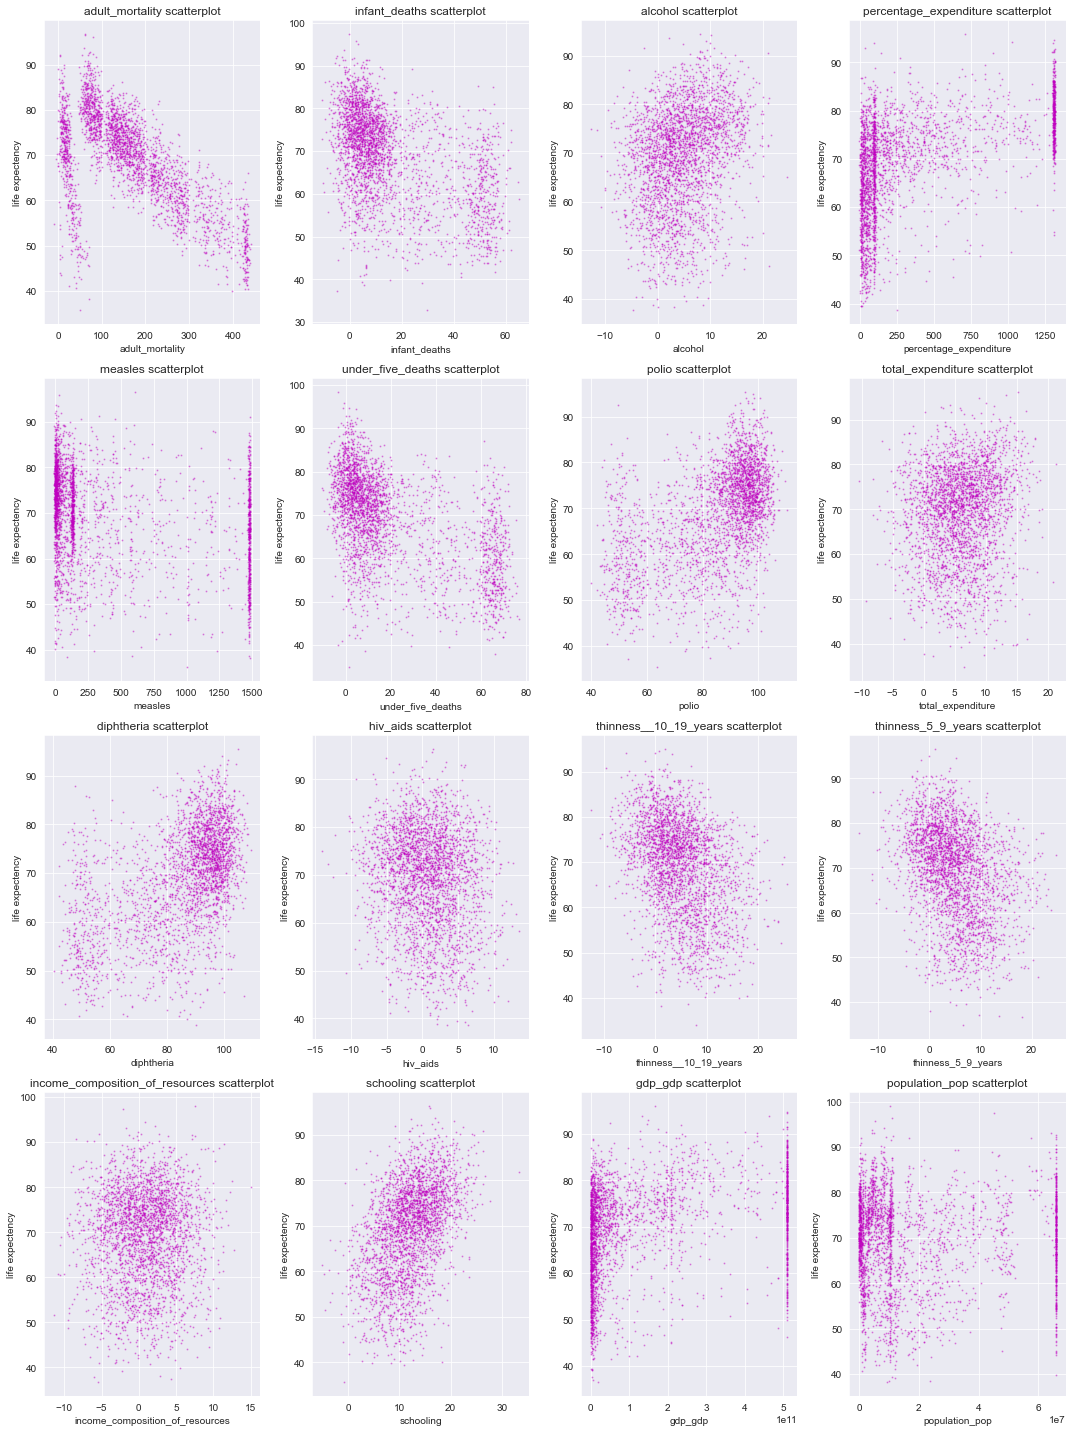

In [67]:
# apply jitter function(comparision2) with modified outliers.

cont_vars = list(life_wins.columns)[4:]
comparision2(life_wins)

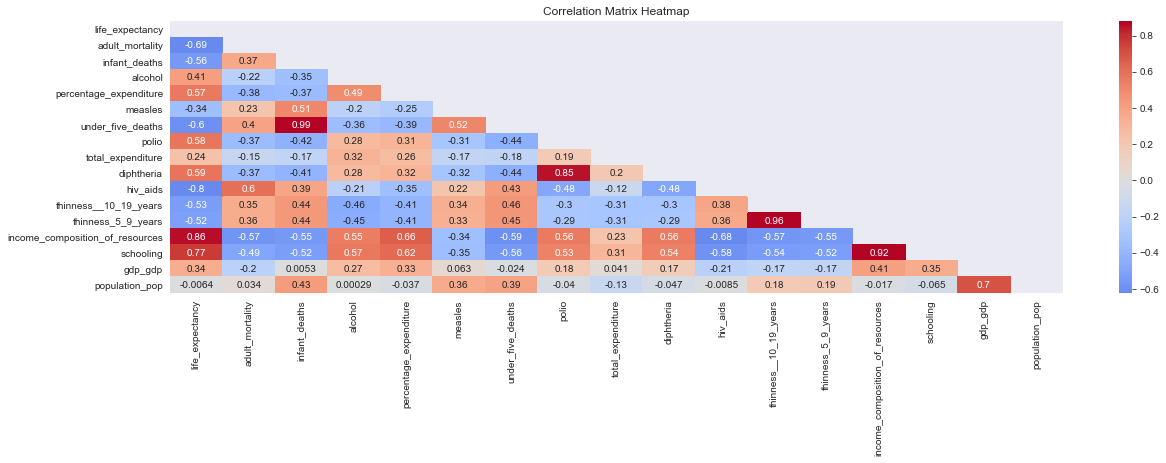

In [68]:
# Draw the corrolation heatmap with modified outliers

lifemap = life_wins.iloc[:,3:]
mask = np.triu(lifemap.corr())
sns.heatmap(lifemap.corr(), annot = True, cmap='coolwarm', mask = mask,center=0, robust=True)
plt.title('Correlation Matrix Heatmap')
plt.savefig('lifemap.png', dpi=300)

In [71]:
results = smf.ols('life_expectancy ~ schooling + adult_mortality+ gdp_gdp + C(status)', 
                  data=life_wins).fit()
results.params

Intercept          5.425771e+01
C(status)[T.1]     1.078683e+00
schooling          1.628799e+00
adult_mortality   -3.372816e-02
gdp_gdp            3.259517e-12
dtype: float64

In [72]:
results = smf.ols('life_expectancy ~ adult_mortality ', 
                  data = life_wins).fit()
results.params

Intercept          78.531211
adult_mortality    -0.057607
dtype: float64

In [75]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     2609.
Date:                Mon, 11 Oct 2021   Prob (F-statistic):               0.00
Time:                        16:32:41   Log-Likelihood:                -9765.2
No. Observations:                2916   AIC:                         1.953e+04
Df Residuals:                    2914   BIC:                         1.955e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          78.5312      0.223    352.768      0.000      78.095      78.968
adult_mortality    -0.0576      0.001    -51.083      0.000      -0.060      -0.055
==============================================================================
Omnibus:                     1031.955   Durbin-Watson:                   0.770
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3890.984
Skew:                          -1.734   Prob(JB):                         0.00
Kurtosis:                       7.472   Cond. No.                         344.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""